<img src='https://www.unifor.br/o/unifor-theme/images/unifor-logo-horizontal.svg' width="250px">

# Séries Temporais - Prática 1

Prof. Túlio Ribeiro<br>
Laboratório de Ciência de Dados e Inteligência Artificial (LCDIA)<br>

MBA em Ciência de Dados<br>
Universidade de Fortaleza

# **1. Análise dos datasets 'Electric_Production.csv' e 'movimentacao_rodoviaria.csv'**

Você recebeu um dataset chamado **Electric_Production.csv** e  **movimentacao_rodoviaria.csv**, que apresenta os dados de produção elétrica em diversos momentos e a quantidade de pessoas estimadas nas rodoviárias, respectivamente. Realize as seguintes tarefas:

## 1.1 Como a produção evoluiu no tempo?
- Crie gráficos que apresentem a evolução da produção elétrica ao longo do tempo.
- Adicione médias móveis (simples, centralizada e exponencial) nos gráficos para analisar a tendência.

## 1.2 O dado é estacionário?
- Verifique a estacionaridade do dado utilizando testes estatísticos, como o **KPSS**.
- Apresente a conclusão com base no p-valor do teste.

## 1.3 O dado apresenta uma distribuição normal?
- Utilize um teste estatístico, como o **Teste de Shapiro-Wilk**


### Observações:
- Para cada item, crie novas células para efetuar seus códigos.
- Nomear variáveis de acordo com o contexto da questão.
- Caso necessário, utilize novas caixas de textos para deixar comentários.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Electric Production**

In [4]:
!gdown 1_0buQPyM_CznA5H5qNMzmizP07jVS2r1

Downloading...
From: https://drive.google.com/uc?id=1_0buQPyM_CznA5H5qNMzmizP07jVS2r1
To: /content/Electric_Production.csv
100% 7.32k/7.32k [00:00<00:00, 24.2MB/s]


In [5]:
df1 = pd.read_csv('Electric_Production.csv')

In [6]:
df1.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [7]:
df1['DATE'] = pd.to_datetime(df1['DATE'])
df1 = df1.rename(columns={'IPG2211A2N': 'PRODUCAO'})
#df1.set_index('DATE', inplace=True)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DATE      397 non-null    datetime64[ns]
 1   PRODUCAO  397 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


In [9]:
df1.head()

,DATE,PRODUCAO
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151


## Questão 1.1 - Como a produção evoluiu no tempo?



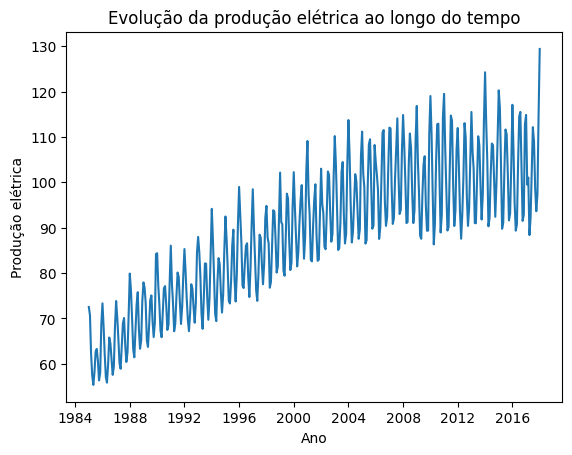

In [11]:
# Plotar Série temporal de análise

plt.plot(df1['DATE'], df1['PRODUCAO'])
plt.title('Evolução da produção elétrica ao longo do tempo')
plt.xlabel('Ano')
plt.ylabel('Produção elétrica')
plt.show()

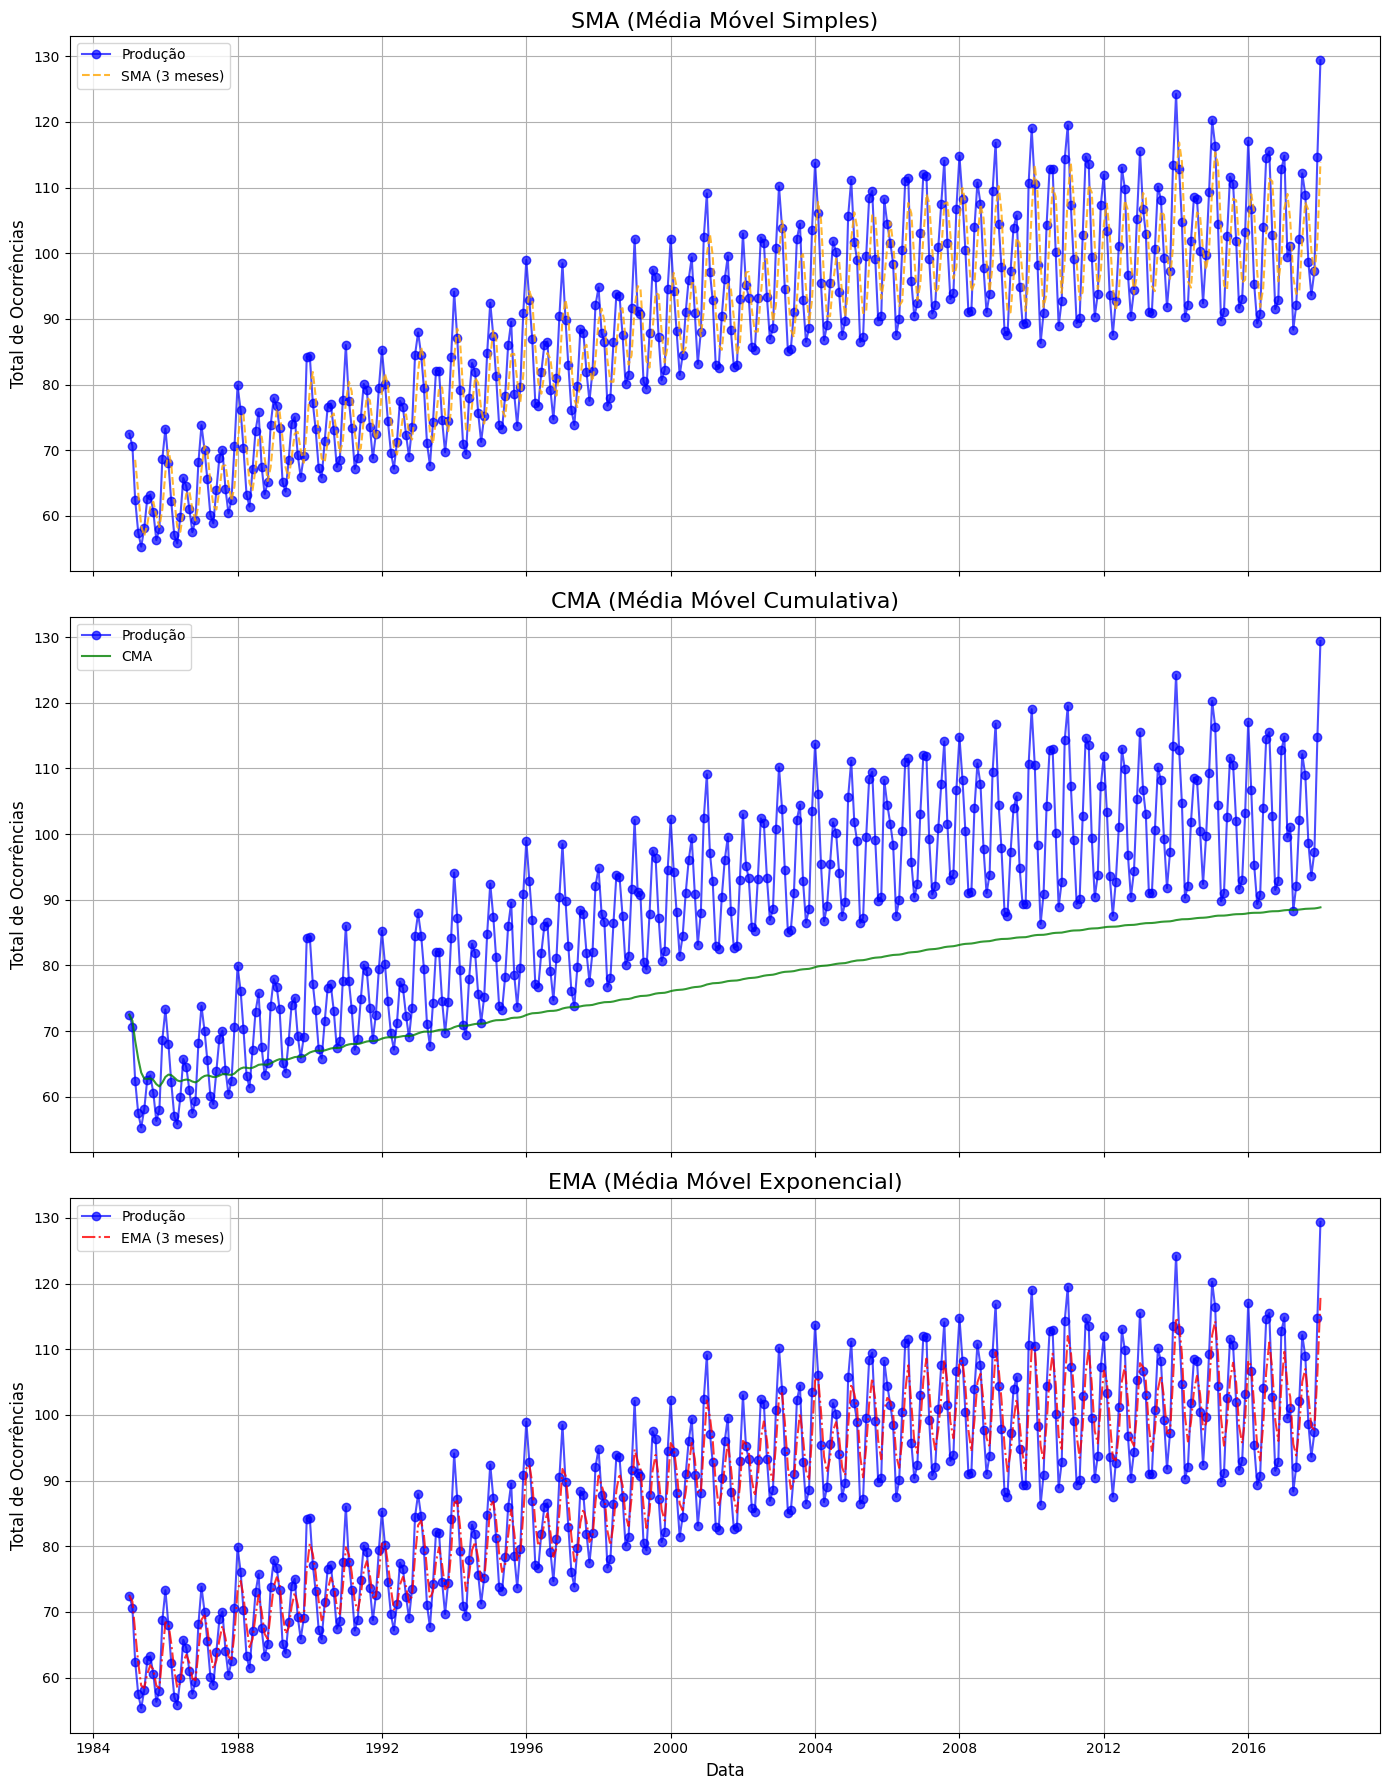

In [12]:
# Plotar médias móveis

# Calcular as médias móveis sobre os dados agregados
df1['SMA'] = df1['PRODUCAO'].rolling(window=3).mean()
df1['CMA'] = df1['PRODUCAO'].expanding().mean()
df1['EMA'] = df1['PRODUCAO'].ewm(span=3, adjust=False).mean()

# Configurar subplots
fig, axes = plt.subplots(3, 1, figsize=(14, 18), sharex=True)

# Plotar SMA
axes[0].plot(df1['DATE'], df1['PRODUCAO'], label='Produção', marker='o', linestyle='-', alpha=0.7, color='blue')
axes[0].plot(df1['DATE'], df1['SMA'], label='SMA (3 meses)', linestyle='--', color='orange', alpha=0.8)
axes[0].set_title('SMA (Média Móvel Simples)', fontsize=16)
axes[0].set_ylabel('Total de Ocorrências', fontsize=12)
axes[0].legend()
axes[0].grid(True)

# Plotar CMA
axes[1].plot(df1['DATE'], df1['PRODUCAO'], label='Produção', marker='o', linestyle='-', alpha=0.7, color='blue')
axes[1].plot(df1['DATE'], df1['CMA'], label='CMA', linestyle='-', color='green', alpha=0.8)
axes[1].set_title('CMA (Média Móvel Cumulativa)', fontsize=16)
axes[1].set_ylabel('Total de Ocorrências', fontsize=12)
axes[1].legend()
axes[1].grid(True)

# Plotar EMA
axes[2].plot(df1['DATE'], df1['PRODUCAO'], label='Produção', marker='o', linestyle='-', alpha=0.7, color='blue')
axes[2].plot(df1['DATE'], df1['EMA'], label='EMA (3 meses)', linestyle='-.', color='red', alpha=0.8)
axes[2].set_title('EMA (Média Móvel Exponencial)', fontsize=16)
axes[2].set_xlabel('Data', fontsize=12)
axes[2].set_ylabel('Total de Ocorrências', fontsize=12)
axes[2].legend()
axes[2].grid(True)

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()


## Questão 1.2 - O dado é estacionário?

### Verifique a estacionaridade do dado utilizando testes estatísticos, como o KPSS. Apresente a conclusão com base no p-valor do teste.

In [14]:
import statsmodels.tsa.stattools

kpss = statsmodels.tsa.stattools.kpss(df1['PRODUCAO'])-


(3.5315970094994853, 0.01, 10, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


<ipython-input-14-35ece1437ba3>:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss = statsmodels.tsa.stattools.kpss(df1['PRODUCAO'])


In [15]:
kpss

(3.5315970094994853,
 0.01,
 10,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [17]:
# Crítico

kpss[3]['5%']

0.463

In [19]:
def teste_estacionaridade(x):
    kpss = statsmodels.tsa.stattools.kpss(x)
    valor_critico = kpss[3]['5%']
    teste = kpss[0]
    if teste <= valor_critico:
        print('A série é estacionária')
    else:
        print('A série NÃO é estacionária')

In [21]:
teste_estacionaridade(df1['PRODUCAO'])

print(f'Valor de teste: {kpss[0]}')
print(f'Valor crítico: {kpss[3]["5%"]}')

A série NÃO é estacionária
Valor de teste: 3.5315970094994853
Valor crítico: 0.463


<ipython-input-19-66bf7d21a1bf>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss = statsmodels.tsa.stattools.kpss(x)


### 1.3 O dado apresenta uma distribuição normal?
Utilize um teste estatístico, como o Teste de Shapiro-Wilk



In [22]:
import scipy.stats as stats

In [27]:
e, p = stats.shapiro(df1['PRODUCAO'])
print(e, p)

0.9870730639317014 0.0013348312140416224


In [28]:
def teste_normalidade(x):
    e, p = stats.shapiro(x)
    if p < 0.05:
        print('A distribuição NÃO é normal')
    else:
        print('A distribuição é normal')

In [29]:
teste_normalidade(df1['PRODUCAO'])

A distribuição NÃO é normal


# **movimentacao_rodoviaria.csv**

In [30]:
!gdown 1Z_cggfZctYyRwqOyrkYGlTf5aQM5unND

Downloading...
From: https://drive.google.com/uc?id=1Z_cggfZctYyRwqOyrkYGlTf5aQM5unND
To: /content/movimentacao_rodoviaria.csv
100% 11.8k/11.8k [00:00<00:00, 29.5MB/s]


In [31]:
df2 = pd.read_csv('movimentacao_rodoviaria.csv', header=None)

In [32]:
df2.head()

,0,1,2,3
0,jan,JOAO THOMÉ,2012,146120.0
1,jan,JOAO THOMÉ,2013,146405.0
2,jan,JOAO THOMÉ,2014,184145.0
3,jan,JOAO THOMÉ,2015,192590.0
4,jan,JOAO THOMÉ,2016,136208.0


In [33]:
df2 = df2.rename(columns={0: 'MES',
                          1: 'RODOVIARIA',
                          2: 'ANO',
                          3: 'PESSOAS'})

In [34]:
df2

,MES,RODOVIARIA,ANO,PESSOAS
0,jan,JOAO THOMÉ,2012,146120.00
1,jan,JOAO THOMÉ,2013,146405.00
2,jan,JOAO THOMÉ,2014,184145.00
3,jan,JOAO THOMÉ,2015,192590.00
4,jan,JOAO THOMÉ,2016,136208.00
...,...,...,...,...
391,dez,MESSEJANA,2018,31364.38
392,dez,MESSEJANA,2019,38652.96
393,dez,MESSEJANA,2020,27195.00
394,dez,MESSEJANA,2021,26732.00


In [35]:
meses_trans = {'jan': 1, 'fev': 2, 'mar': 3, 'abr': 4, 'mai': 5,
               'jun': 6, 'jul': 7, 'ago': 8, 'set': 9, 'out': 10,
               'nov': 11, 'dez': 12}

df2['DATA'] = pd.to_datetime(df2['ANO'].astype(str) + '-' + df2['MES'].map(meses_trans).astype(str))

df2 = df2.sort_values('DATA').reset_index(drop=True)
df2.head()

,MES,RODOVIARIA,ANO,PESSOAS,DATA
0,jan,JOAO THOMÉ,2012,146120.0,2012-01-01
1,jan,ANT. BEZERRA,2012,42000.0,2012-01-01
2,jan,MESSEJANA,2012,18360.0,2012-01-01
3,fev,JOAO THOMÉ,2012,130070.0,2012-02-01
4,fev,ANT. BEZERRA,2012,37530.0,2012-02-01


In [37]:
df2['RODOVIARIA'].unique()

array(['JOAO THOMÉ', 'ANT. BEZERRA', 'MESSEJANA'], dtype=object)

### 1.1

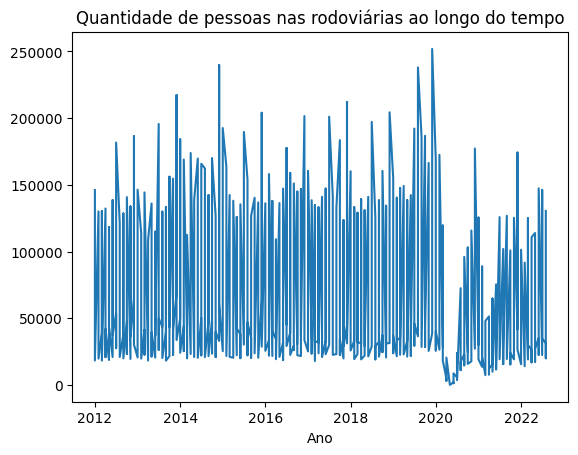

In [40]:
# Plotar Série temporal de análise

plt.plot(df2['DATA'], df2['PESSOAS'])
plt.title('Quantidade de pessoas nas rodoviárias ao longo do tempo')
plt.xlabel('Ano')
plt.show()


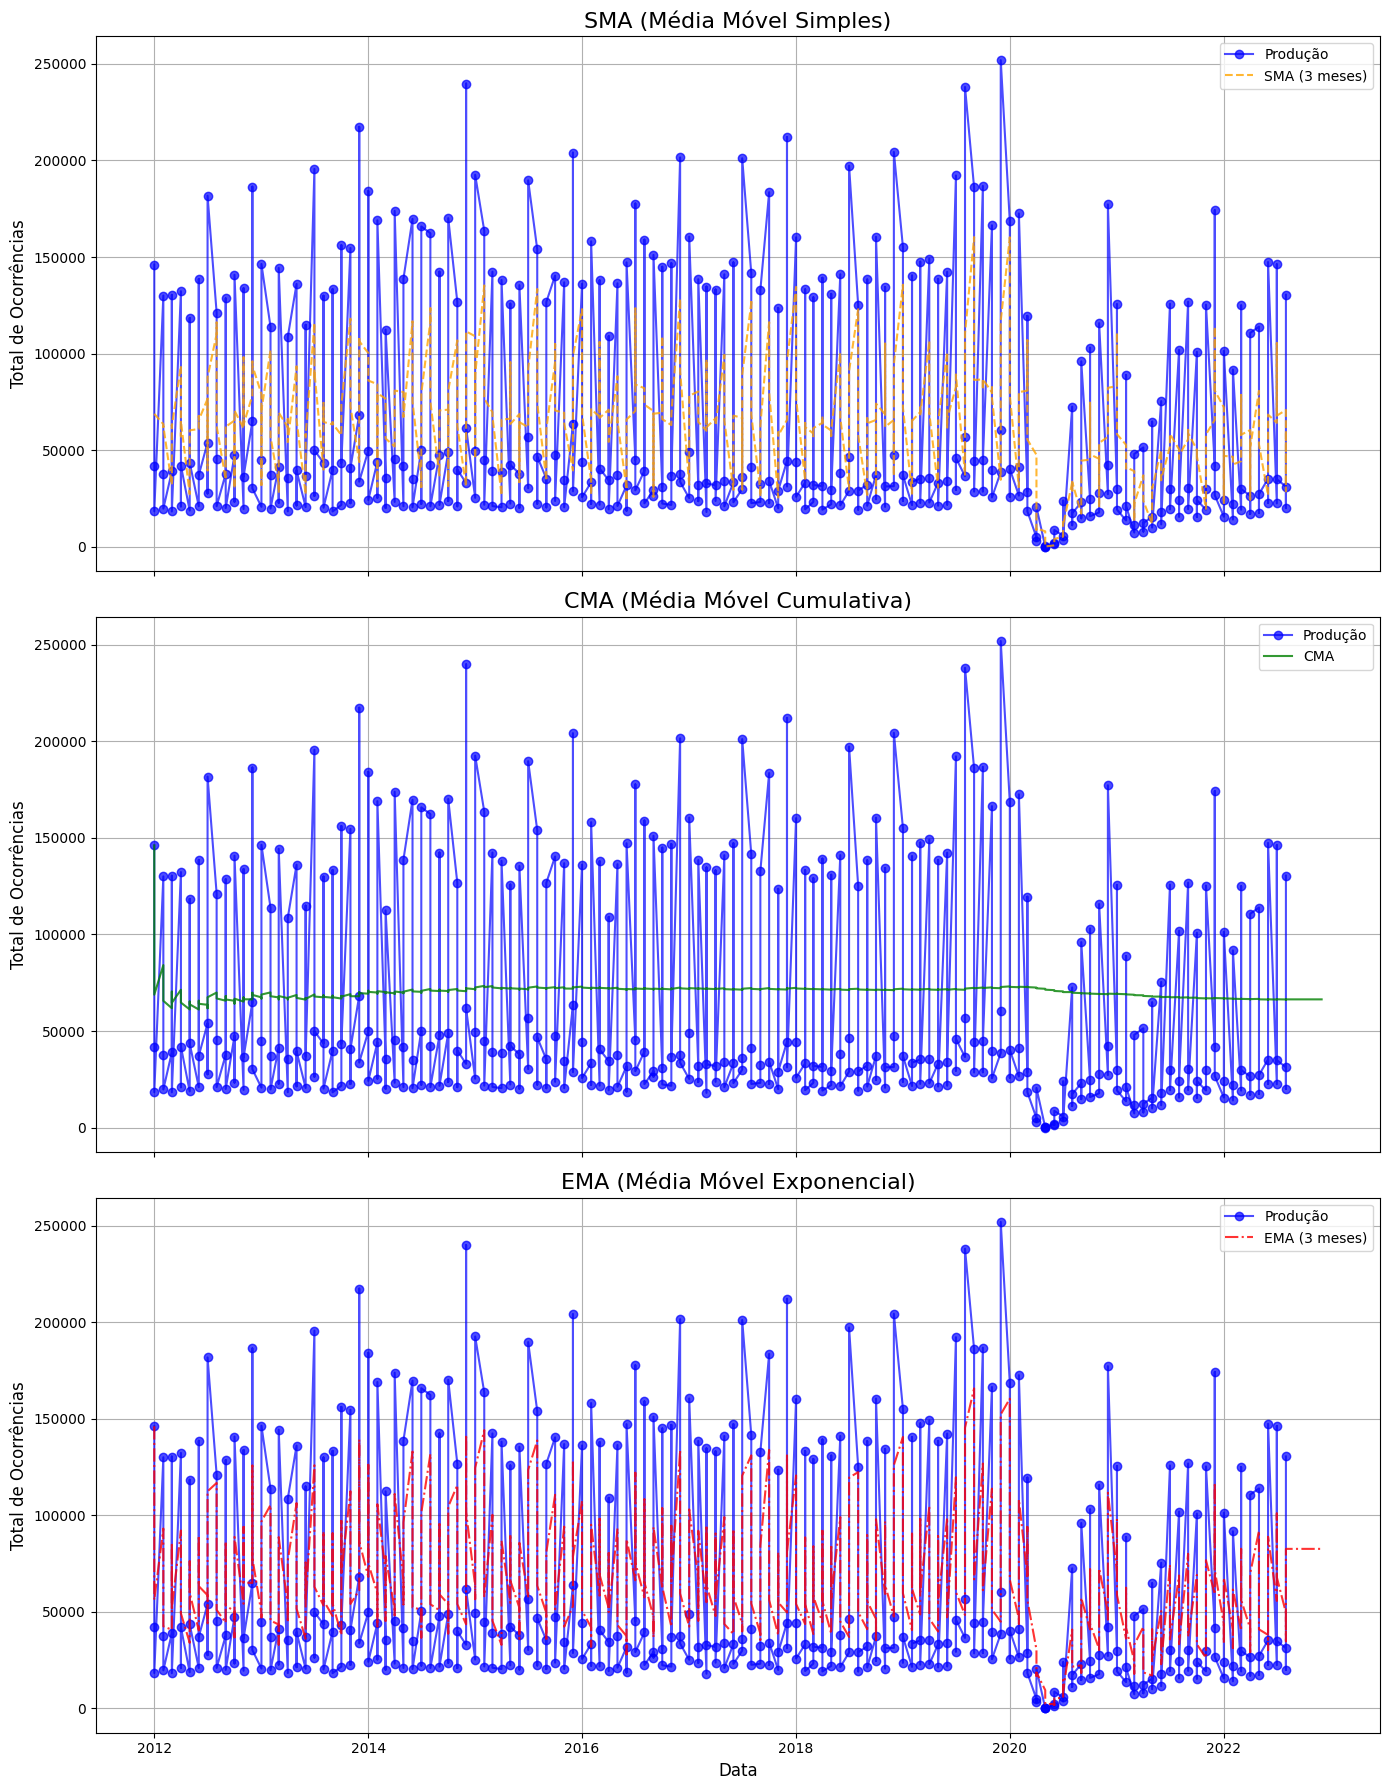

In [43]:
# Plotar médias móveis

# Calcular as médias móveis sobre os dados agregados
df2['SMA'] = df2['PESSOAS'].rolling(window=3).mean()
df2['CMA'] = df2['PESSOAS'].expanding().mean()
df2['EMA'] = df2['PESSOAS'].ewm(span=3, adjust=False).mean()

# Configurar subplots
fig, axes = plt.subplots(3, 1, figsize=(14, 18), sharex=True)

# Plotar SMA
axes[0].plot(df2['DATA'], df2['PESSOAS'], label='Produção', marker='o', linestyle='-', alpha=0.7, color='blue')
axes[0].plot(df2['DATA'], df2['SMA'], label='SMA (3 meses)', linestyle='--', color='orange', alpha=0.8)
axes[0].set_title('SMA (Média Móvel Simples)', fontsize=16)
axes[0].set_ylabel('Total de Ocorrências', fontsize=12)
axes[0].legend()
axes[0].grid(True)

# Plotar CMA
axes[1].plot(df2['DATA'], df2['PESSOAS'], label='Produção', marker='o', linestyle='-', alpha=0.7, color='blue')
axes[1].plot(df2['DATA'], df2['CMA'], label='CMA', linestyle='-', color='green', alpha=0.8)
axes[1].set_title('CMA (Média Móvel Cumulativa)', fontsize=16)
axes[1].set_ylabel('Total de Ocorrências', fontsize=12)
axes[1].legend()
axes[1].grid(True)

# Plotar EMA
axes[2].plot(df2['DATA'], df2['PESSOAS'], label='Produção', marker='o', linestyle='-', alpha=0.7, color='blue')
axes[2].plot(df2['DATA'], df2['EMA'], label='EMA (3 meses)', linestyle='-.', color='red', alpha=0.8)
axes[2].set_title('EMA (Média Móvel Exponencial)', fontsize=16)
axes[2].set_xlabel('Data', fontsize=12)
axes[2].set_ylabel('Total de Ocorrências', fontsize=12)
axes[2].legend()
axes[2].grid(True)

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()


### 1.2

In [45]:
df2['PESSOAS'].isna().sum()

12

In [46]:
df2.dropna(inplace=True)

In [47]:
import statsmodels.tsa.stattools

kpss = statsmodels.tsa.stattools.kpss(df2['PESSOAS'])


In [50]:
kpss

(0.6465666797902391,
 0.018403029109978264,
 14,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [49]:
teste_estacionaridade(df2['PESSOAS'])

print(f'Valor de teste: {kpss[0]}')
print(f'Valor crítico: {kpss[3]["5%"]}')

A série NÃO é estacionária
Valor de teste: 0.6465666797902391
Valor crítico: 0.463


### 1.3

In [51]:
teste_normalidade(df2['PESSOAS'])

A distribuição NÃO é normal
